# **Глава 5. Уменьшение размерности**

*Вопрос 1: Как связаны главные компоненты с исходными данными?*

Ответ:

Главные компоненты - это линейные комбинации исходных признаков, которые представляют данные в новом ортогональном базисе. Они позволяют уменьшить размерность, сохраняя максимально возможную дисперсию данных.

Связь главных компонент с исходными данными можно проиллюстрировать с помощью метода главных компонент, который является методом уменьшения размерности, преобразовывая исходные данные в новую систему координат, где оси соответствуют главным компонентам.

*Вопрос 2: Сделайте грубую оценку сжатия данных, если исходная матрица имела размерность $\ (4250, 7) $, а при восстановлении используются три главные компоненты.*

Ответ:

Сжатие данных с использованием метода главных компонент (PCA):

Так как размер исходной матрицы $\ 4250 \times 7$, то общее количество элементов будет составлять $\ 4250 * 7 = 29750$.

Теперь вместо 7 исходных компонент по условию задачи необходимо использовать 3. Таким образом, количество элементов в новой матрице будет составлять $\ 4250 * 3 = 12750$, а матрица весов (компоненты преобразования) составляет $\ 3 * 7 = 21$. Следовательно, общий объём данных после сжатия составит $\ 12750 + 21 = 12771$.

Можно оценить степень полученного сжатия:

$\ \frac {12771} {29750} \approx 0,43$

Это означает, что данные были сжаты на 57% (или в 2,3 раза) и теперь составляют 43% от исходного объёма.




*Вопрос 3: Сгенерируйте данные в виде эллипса с центром в точке $\ (1.5, -2.5) $, радиусами $\ (3, 2.5)$, углом $\ 65$ и количеством точек $\ 1100$.
Оцените собственные вектора, собственные значения, максимальные и минимальные значения в пространстве главных компонент.*

Ответ: Ниже представлен код программы, результат выполнения которой даёт ответы на вопросы задачи.

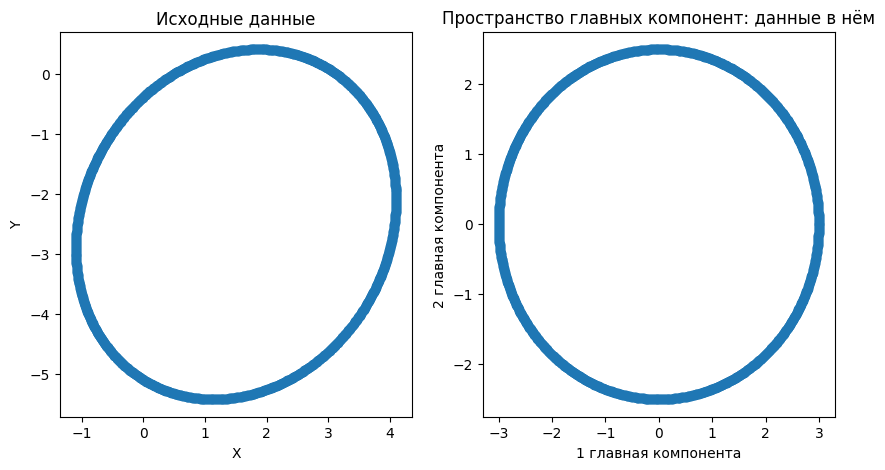

Собственные значения: [4.50818182 3.125     ]
Собственные векторы:
 [[ 0.42261826  0.90630779]
 [ 0.90630779 -0.42261826]]
Объясненная дисперсия каждой из компонент: [0.59060323 0.40939677]
Min значение 1 главной компоненты: -3.002715015412928
Max значение 1 главной компоненты: 2.9972727272727284
Min значение 2 главной компоненты: -2.499997446391541
Max значение 2 главной компоненты: 2.499997446391541


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

center = np.array([1.5, -2.5])
radii = np.array([3, 2.5])
angle = np.deg2rad(65)
num_points = 1100

# Генерация данных эллипса
theta = np.linspace(0, 2*np.pi, num_points)
x = center[0] + radii[0] * np.cos(theta) * np.cos(angle) - radii[1] * np.sin(theta) * np.sin(angle)
y = center[1] + radii[0] * np.cos(theta) * np.sin(angle) + radii[1] * np.sin(theta) * np.cos(angle)
data = np.column_stack((x, y))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Исходные данные')

pca = PCA()
pca.fit(data)
transformed_data = pca.transform(data)

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('1 главная компонента')
plt.ylabel('2 главная компонента')
plt.title('Пространство главных компонент: данные в нём')
plt.show()

print("Собственные значения:", pca.explained_variance_)
print("Собственные векторы:\n", pca.components_)

explained_variance_ratio = pca.explained_variance_ratio_
print("Объясненная дисперсия каждой из компонент:", explained_variance_ratio)

print("Min значение 1 главной компоненты:", transformed_data[:, 0].min())
print("Max значение 1 главной компоненты:", transformed_data[:, 0].max())
print("Min значение 2 главной компоненты:", transformed_data[:, 1].min())
print("Max значение 2 главной компоненты:", transformed_data[:, 1].max())

*Вопрос 4: Для набора данных Cars проанализируйте веса главных компонент при использовании числовых признаков. Какой из параметров вносит наименьший вклад в первую главную компоненту?*

Ответ: Ниже представлен код программы, результат выполнения которой даёт ответы на вопросы задачи.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cars.csv')

numeric_features = df.select_dtypes(include=['float64', 'int64']) # Выбор числовых признаков
scaler = StandardScaler() # Данные масштабируются
scaled_data = scaler.fit_transform(numeric_features)

pca = PCA()
pca.fit(scaled_data)

pca_components = pd.DataFrame(pca.components_, columns=numeric_features.columns) # Получение весов признаков
first_component_weights = pca_components.iloc[0] # Вклад признаков в 1 главную компоненту
min_contribution_param = first_component_weights.idxmin() # Параметр с наим. вкладом в 1 главную компоненту

print("Веса признаков для первой главной компоненты:\n", first_component_weights)
print("\nПараметр, вносящий наименьший вклад в первую главную компоненту:", min_contribution_param)

Веса признаков для первой главной компоненты:
 Year                    0.650361
Distance               -0.452745
Engine_capacity(cm3)    0.188220
Price(euro)             0.580194
Name: 0, dtype: float64

Параметр, вносящий наименьший вклад в первую главную компоненту: Distance
